In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import pandas as pd
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from src.utils.general_utils import Visualizer

In [4]:
data_dir = 'references/pascal_voc_data.csv'
df = pd.read_csv(data_dir)
df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,007826.jpg,500,375,diningtable,80,217,320,273
1,007826.jpg,500,375,chair,197,193,257,326
2,007826.jpg,500,375,chair,139,184,185,231
3,007826.jpg,500,375,chair,258,180,312,314
4,007826.jpg,500,375,chair,10,195,93,358


In [5]:
image_path = '../Datasets/VOCdevkit/VOC2007/JPEGImages/'
df['filename'] = [os.path.join(image_path, i) for i in df.filename.values]
df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,../Datasets/VOCdevkit/VOC2007/JPEGImages/00782...,500,375,diningtable,80,217,320,273
1,../Datasets/VOCdevkit/VOC2007/JPEGImages/00782...,500,375,chair,197,193,257,326
2,../Datasets/VOCdevkit/VOC2007/JPEGImages/00782...,500,375,chair,139,184,185,231
3,../Datasets/VOCdevkit/VOC2007/JPEGImages/00782...,500,375,chair,258,180,312,314
4,../Datasets/VOCdevkit/VOC2007/JPEGImages/00782...,500,375,chair,10,195,93,358


In [6]:
le = LabelEncoder()
int_cls = le.fit(df['class'].unique())
df['labels'] = le.transform(df['class'])
df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax,labels
0,../Datasets/VOCdevkit/VOC2007/JPEGImages/00782...,500,375,diningtable,80,217,320,273,10
1,../Datasets/VOCdevkit/VOC2007/JPEGImages/00782...,500,375,chair,197,193,257,326,8
2,../Datasets/VOCdevkit/VOC2007/JPEGImages/00782...,500,375,chair,139,184,185,231,8
3,../Datasets/VOCdevkit/VOC2007/JPEGImages/00782...,500,375,chair,258,180,312,314,8
4,../Datasets/VOCdevkit/VOC2007/JPEGImages/00782...,500,375,chair,10,195,93,358,8


In [7]:
names = list(df.labels.unique())
names.sort()

# Create the label dictionary
label_dict = {idx:clas for idx, clas in zip(names, list(le.inverse_transform(names)))}
label_dict

{0: 'aeroplane',
 1: 'bicycle',
 2: 'bird',
 3: 'boat',
 4: 'bottle',
 5: 'bus',
 6: 'car',
 7: 'cat',
 8: 'chair',
 9: 'cow',
 10: 'diningtable',
 11: 'dog',
 12: 'horse',
 13: 'motorbike',
 14: 'person',
 15: 'pottedplant',
 16: 'sheep',
 17: 'sofa',
 18: 'train',
 19: 'tvmonitor'}

In [8]:
# Instantiate the visualizer
viz = Visualizer(class_names=label_dict)

In [9]:
fname = df['filename'][0]
boxes = df.loc[df['filename'] == fname][['xmin', 'ymin', 'xmax', 'ymax']].values
labels = df.loc[df['filename'] == fname]['labels'].values

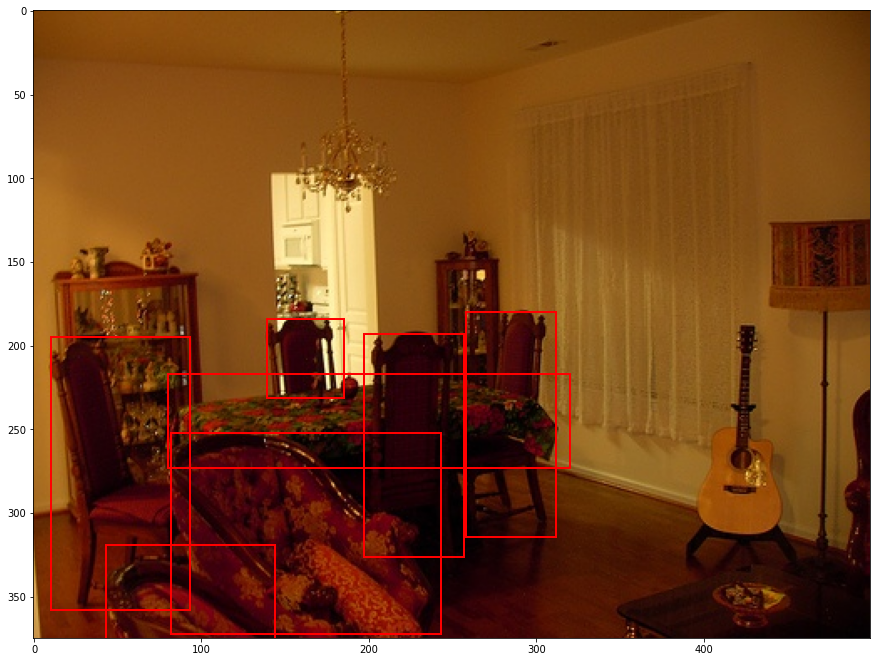

In [10]:
# Plot without labels
viz.draw_bboxes(fname, boxes=boxes)

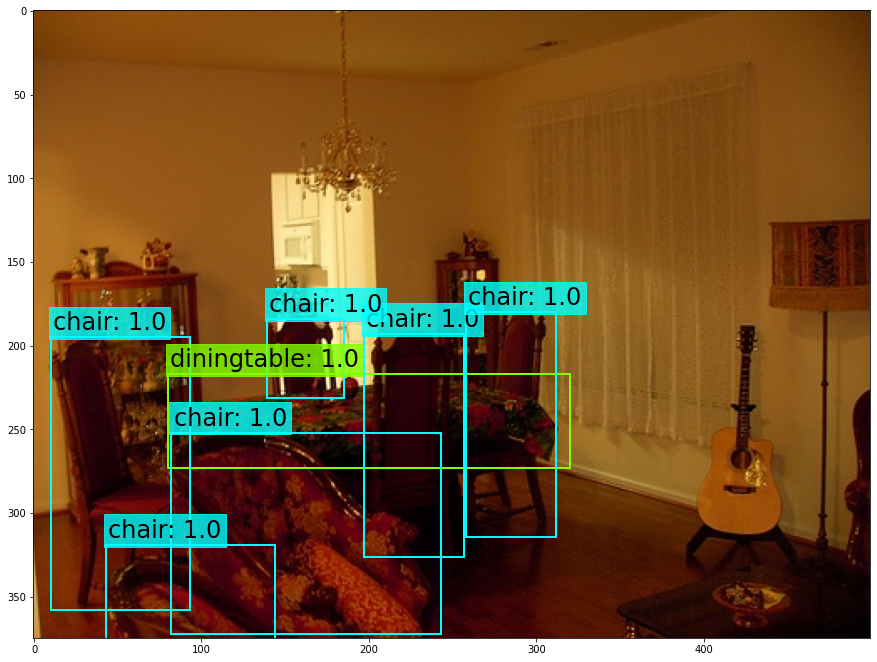

In [11]:
# plot with labels
viz.draw_bboxes(fname, boxes=boxes, classes=labels)

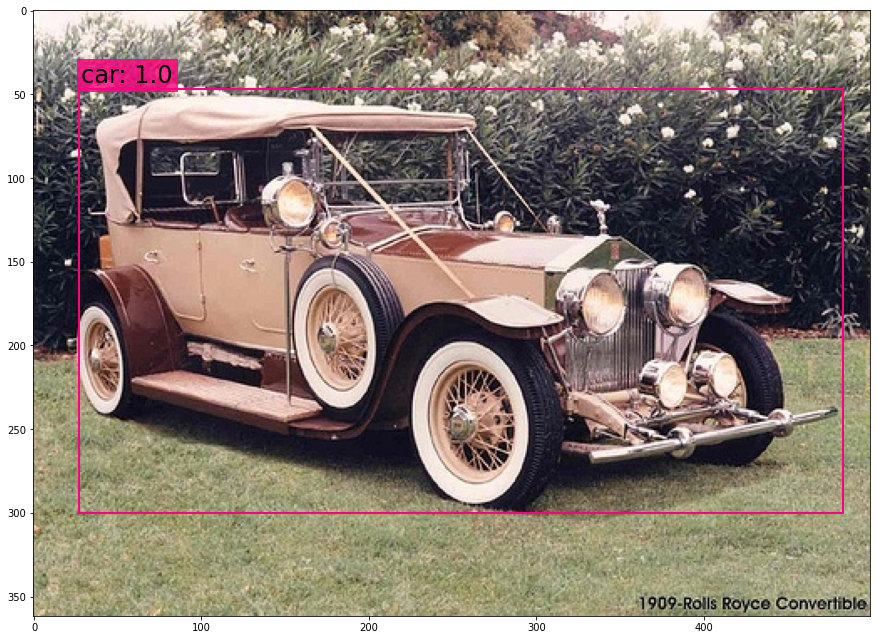

In [12]:
fname = df['filename'][50]
boxes = df.loc[df['filename'] == fname][['xmin', 'ymin', 'xmax', 'ymax']].values
labels = df.loc[df['filename'] == fname]['labels'].values

viz.draw_bboxes(fname, boxes=boxes, classes=labels)

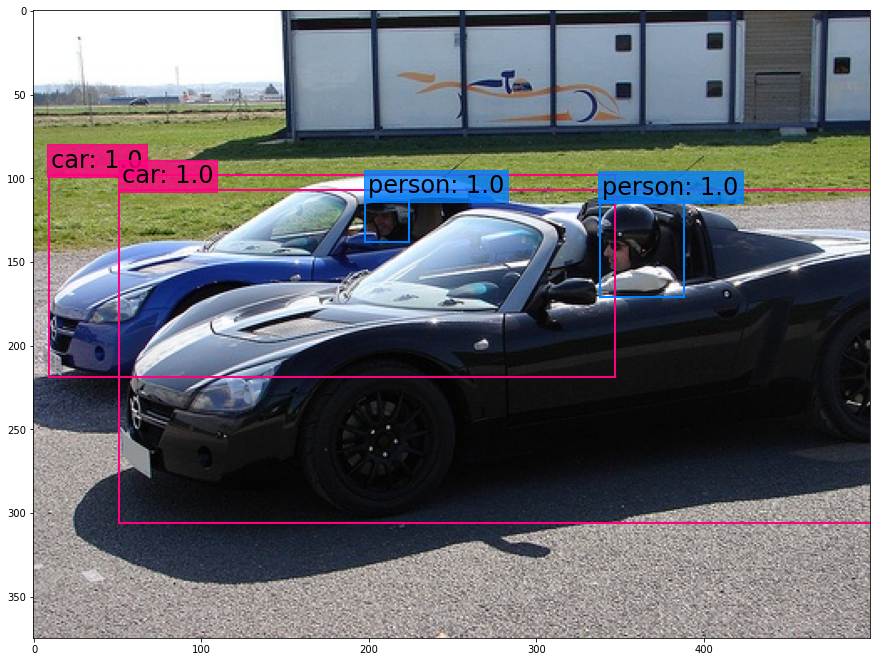

In [13]:
fname = df['filename'][100]
boxes = df.loc[df['filename'] == fname][['xmin', 'ymin', 'xmax', 'ymax']].values
labels = df.loc[df['filename'] == fname]['labels'].values

viz.draw_bboxes(fname, boxes=boxes, classes=labels)